In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix

In [2]:
bank=pd.read_csv('bank-full.csv')

In [3]:
bank.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [177]:
bank.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [4]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [5]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
cols=['job','marital','education','default','housing','loan','contact','month','poutcome','Target']

In [16]:
bank[cols] = bank[cols].apply(LabelEncoder().fit_transform)

In [17]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [176]:
bank.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


# MODEL BUIlLDING

In [20]:
x=bank.drop('Target',axis=1)
y=bank[['Target']]

In [21]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [22]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [23]:
y.value_counts()

Target
0         39922
1          5289
dtype: int64

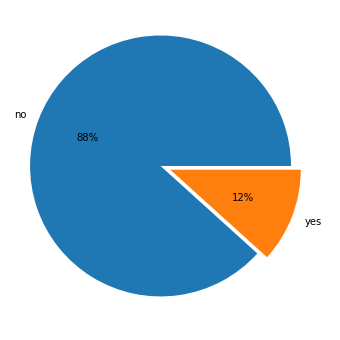

In [30]:
plt.figure(figsize=(8,6))
plt.pie(x=y.value_counts(),explode=[0.08,0],labels=['no','yes'],autopct='%1.0f%%')
plt.show()

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=123)

In [57]:
xtrain.shape,ytrain.shape

((36168, 16), (36168, 1))

In [58]:
xtest.shape,ytest.shape

((9043, 16), (9043, 1))

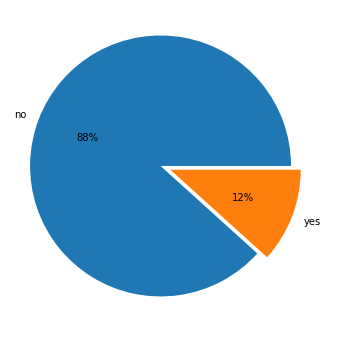

In [59]:
plt.figure(figsize=(8,6))
plt.pie(x=ytrain.value_counts(),explode=[0.08,0],labels=['no','yes'],autopct='%1.0f%%')
plt.show()

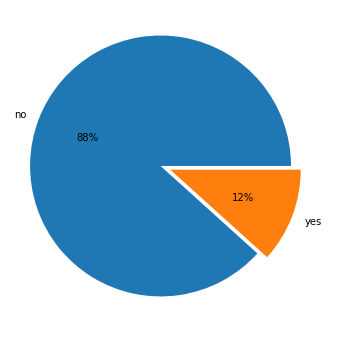

In [60]:
plt.figure(figsize=(8,6))
plt.pie(x=ytest.value_counts(),explode=[0.08,0],labels=['no','yes'],autopct='%1.0f%%')
plt.show()

# MODEL TESTING

# WITH LOGISTIC REGRESSION

In [67]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [112]:
logmodel=LogisticRegression(class_weight={0:1,1:6})


In [113]:
logmodel.fit(xtrain,ytrain)

LogisticRegression(class_weight={0: 1, 1: 6})

In [114]:
ytrainpredlog=logmodel.predict(xtrain)


In [115]:
ytrainpredlog

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# MODEL EVALUATION FOR LOGISTIC MODEL

#### for train data

In [116]:
print(confusion_matrix(ytrain,ytrainpredlog))

[[26467  5469]
 [ 1345  2887]]


In [117]:
print(classification_report(ytrain,ytrainpredlog))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     31936
           1       0.35      0.68      0.46      4232

    accuracy                           0.81     36168
   macro avg       0.65      0.76      0.67     36168
weighted avg       0.88      0.81      0.84     36168



In [118]:
accuracy_score(ytrain,ytrainpredlog)

0.8116014156160142

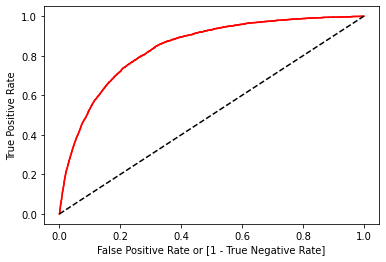

auc accuracy: 0.7554673086721647


In [173]:
fpr,tpr,thresholds=roc_curve(y,logmodel.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(ytrain,ytrainpredlog)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

#### for test data

In [119]:
ytestpredlog=logmodel.predict(xtest)

In [120]:
print(confusion_matrix(ytest,ytestpredlog))

[[6596 1390]
 [ 353  704]]


In [121]:
print(classification_report(ytest,ytestpredlog))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      7986
           1       0.34      0.67      0.45      1057

    accuracy                           0.81      9043
   macro avg       0.64      0.75      0.67      9043
weighted avg       0.88      0.81      0.83      9043



In [90]:
print(accuracy_score(ytest,ytestpredlog))

0.8898595598805706


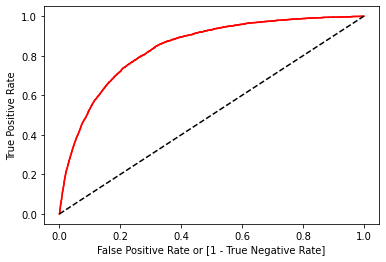

auc accuracy: 0.745990677630982


In [174]:
fpr,tpr,thresholds=roc_curve(y,logmodel.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(ytest,ytestpredlog)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

# With Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [162]:
grid=GridSearchCV(estimator=rfmodel,param_grid={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8]},cv=5)

In [163]:
grid.fit(x,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 6},
                                              criterion='entropy',
                                              max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8]})

In [167]:
grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 6},
                                              criterion='entropy',
                                              max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8]})>

In [168]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [156]:
rfmodel=RandomForestClassifier(criterion='entropy',max_depth=5,class_weight={0:1,1:6})

In [157]:
rfmodel.fit(xtrain,ytrain)

RandomForestClassifier(class_weight={0: 1, 1: 6}, criterion='entropy',
                       max_depth=5)

In [158]:
ypredrf=rfmodel.predict(xtrain)

# MODEL EVALUATION FOR RANDOM FOREST


# TRAIN DATA

In [159]:
print(confusion_matrix(ytrain,ypredrf))

[[27091  4845]
 [  818  3414]]


In [160]:
print(classification_report(ytrain,ypredrf))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     31936
           1       0.41      0.81      0.55      4232

    accuracy                           0.84     36168
   macro avg       0.69      0.83      0.73     36168
weighted avg       0.91      0.84      0.86     36168



In [161]:
accuracy_score(ytrain,ypredrf)

0.8434251271842512

# TEST DATA

In [164]:
ytestpredrf=rfmodel.predict(xtest)

In [165]:
print(confusion_matrix(ytest,ytestpredrf))

[[6782 1204]
 [ 229  828]]


In [166]:
print(classification_report(ytest,ytestpredrf))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      7986
           1       0.41      0.78      0.54      1057

    accuracy                           0.84      9043
   macro avg       0.69      0.82      0.72      9043
weighted avg       0.90      0.84      0.86      9043



In [169]:
print(accuracy_score(ytest,ytestpredrf))

0.8415348888643149
